In [3]:
# get data from google drive - optained via BERTopic 
import pandas as pd

file_path = '/Users/andreeanistor/Google Drive/My Drive/MS_DS_NLP_project/bertopics_reddit_aba_posts.csv'
aba_posts = pd.read_csv(file_path)
aba_posts.info() # no missing data, documents text has been cleaned previously

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Document                 3560 non-null   object 
 1   Topic                    3560 non-null   int64  
 2   Name                     3560 non-null   object 
 3   Representation           3560 non-null   object 
 4   Representative_Docs      3560 non-null   object 
 5   Top_n_words              3560 non-null   object 
 6   Probability              3560 non-null   float64
 7   Representative_document  3560 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 198.3+ KB


In [7]:
aba_posts.head(3) 

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,As an autistic person please listen to us when...,4,4_aba_bcba_rbt_bcbas,"['aba', 'bcba', 'rbt', 'bcbas', 'rbts', 'field...",['I had ABA and have nothing bad to say of it'...,aba - bcba - rbt - bcbas - rbts - field - hour...,1.0,False
1,My daughter who has down syndrome and autism d...,4,4_aba_bcba_rbt_bcbas,"['aba', 'bcba', 'rbt', 'bcbas', 'rbts', 'field...",['I had ABA and have nothing bad to say of it'...,aba - bcba - rbt - bcbas - rbts - field - hour...,1.0,False
2,One bit of word from an autistic adult Stop AB...,4,4_aba_bcba_rbt_bcbas,"['aba', 'bcba', 'rbt', 'bcbas', 'rbts', 'field...",['I had ABA and have nothing bad to say of it'...,aba - bcba - rbt - bcbas - rbts - field - hour...,1.0,False


In [4]:
aba_posts.Top_n_words[0]

'aba - bcba - rbt - bcbas - rbts - field - hours - slp - therapy - ot'

In [5]:
aba_posts.Representative_Docs[0]

'[\'I had ABA and have nothing bad to say of it\', \'I know what ABA is but what s PBIS\', "I don\'t do ABA on myself I go to ABA therapy"]'

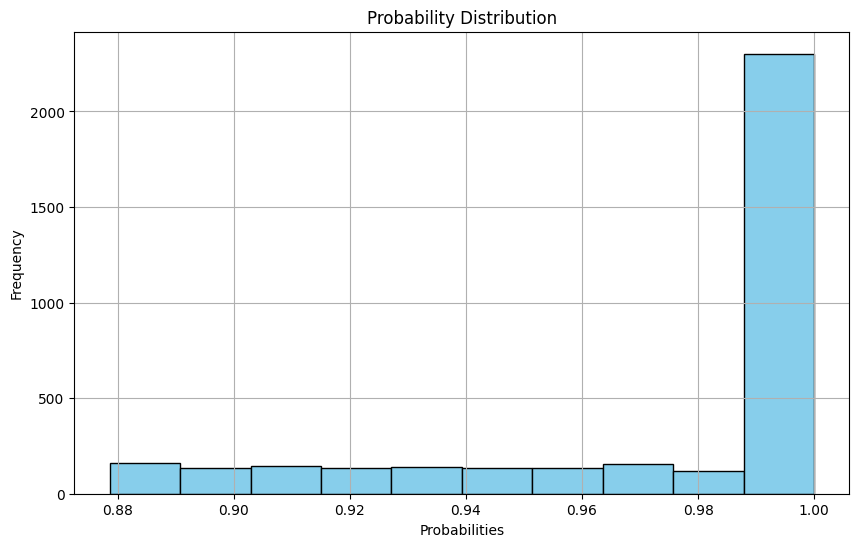

In [11]:
import matplotlib.pyplot as plt

# Plot the 'Probabilities' column
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.hist(aba_posts['Probability'], bins=10, color='skyblue', edgecolor='black')
plt.title('Probability Distribution')
plt.xlabel('Probabilities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# all the posts found by bertopic seem to be relevant to aba , most have 100% probability to belong to this topic

In [15]:
# we only need the text / document column 
# drop the other columns
aba_posts = aba_posts[['Document']]
aba_posts.info()
aba_posts.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  3560 non-null   object
dtypes: object(1)
memory usage: 27.9+ KB


,Document
0,As an autistic person please listen to us when...
1,My daughter who has down syndrome and autism d...
2,One bit of word from an autistic adult Stop AB...


# Sentiment analysis
- Supervised NLP task --> we need labeled data

- Like topic modeling there are 2 main approaches:<br><br>
        1. Traditional machine learning (preprocess data, then apply classical classification algrith like random forest, svm, logistic regression etc.)<br><br>
        2. Deep learning ( no preprocessing neccesary; raw data is fed into a transformer model, in NLP ususaly these come pretrained and are fine tuned to the speciffic dataset; this method has shown good performance even when using small datasets - Hartmann et al., 2023)<br>


We need to have a dataset of labeled data -> 500 posts will be selected at random from the aba data set and manually labeled by the author. Sentiment analysis models will be train / fine tuned using this small data set and the best model will be used to clasify all the posts.


<small>Hartmann, J., Heitmann, M., Siebert, C., & Schamp, C. (2023). More than a Feeling: Accuracy and Application of Sentiment Analysis. International Journal of Research in Marketing, 40, 75–87.</small>

In [16]:
# select the data to be labeled - 500 row at random
aba_posts_to_label = aba_posts.sample(n=500, random_state=7) 
aba_posts_to_label.info()
aba_posts_to_label.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 2626 to 3029
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  500 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


,Document
2626,Is she in ABA therapy I only ask because my hu...
858,I heard you are able to ask them questions May...
3210,I agree with that Even dr Lovaas said ABA does...


In [17]:
# save posts to be labeled in a csv file
file_path = 'data/aba_posts_labeled.csv'
aba_posts_to_label.to_csv(file_path, index=False)